In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import h5py
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
from cnn_utils import *
from test_utils import summary, comparator


%matplotlib inline
np.random.seed(1)

In [2]:
X_train_orig,Y_train_orig,X_test_orig,Y_test_orig,classes=load_signs_dataset() #dataset load in cnn_utils 

X_train=X_train_orig/255.
X_test=X_test_orig/255.

#reshape
Y_train=convert_to_one_hot(Y_train_orig,6).T
Y_test=convert_to_one_hot(Y_test_orig,6).T

print('no of training egs=' +str(X_train.shape[0]))
print('no of testing egs=' +str(X_test.shape[0]))
print('X_train shape:'+str(X_train.shape))
print('Y_train shape:'+str(Y_train.shape))
print('X_test shape:'+str(X_test.shape))
print('Y_test shape:'+str(Y_test.shape))


no of training egs=1080
no of testing egs=120
X_train shape:(1080, 64, 64, 3)
Y_train shape:(1080, 6)
X_test shape:(120, 64, 64, 3)
Y_test shape:(120, 6)


- conv2D use 8 4x4 filters, stide 1,padding is 'same'
- ReLU
- Maxpool2D use 8x8 filter size and 8x8 stride padding is 'same'
- conv2D use 16 2x2 filters, stide 1,padding is 'same'
- ReLU
- Maxpool2D use 4x4 filter size and 4x4 stride padding is 'same'
- Flatten the previous op
- Fully-connecte(Dense) layer ..Apply a fully connected layer with 6 neurons and a softmax activation

In [3]:
def convolution_model(input_shape):
    
    input_img=tf.keras.Input(shape=input_shape)
    
    #1st layer
    Z1=tfl.Conv2D(filters=8,kernel_size=(4,4),strides=(1,1),padding='SAME')(input_img)
    
    A1=tfl.ReLU()(Z1)
    
    P1=tfl.MaxPool2D(pool_size=(8,8),strides=(8,8),padding='SAME')(A1)
    
    #2ndlayer
    Z2=tfl.Conv2D(filters=16,kernel_size=(2,2),strides=(1,1),padding='SAME')(P1)
    
    A2=tfl.ReLU()(Z2)
    
    P2=tfl.MaxPool2D(pool_size=(4,4),strides=(4,4),padding='SAME')(A2)
    
    F=tfl.Flatten()(P2)
    outputs=tfl.Dense(6,activation='softmax')(F)
    model=tf.keras.Model(inputs=input_img,outputs=outputs)
    
    return model
    

In [4]:
conv_model=convolution_model((64,64,3))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

conv_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 8)         392       
_________________________________________________________________
re_lu (ReLU)                 (None, 64, 64, 8)         0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          528       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 8, 8, 16)          0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 16)         

In [5]:
train_dataset=tf.data.Dataset.from_tensor_slices((X_train,Y_train)).batch(64)
test_dataset=tf.data.Dataset.from_tensor_slices((X_test,Y_test)).batch(64)

history=conv_model.fit(train_dataset,epochs=100,validation_data=test_dataset)

Epoch 1/100
17/17 [==============================] - 1s 80ms/step - loss: 1.8054 - accuracy: 0.1667 - val_loss: 1.7907 - val_accuracy: 0.1667
Epoch 2/100
17/17 [==============================] - 1s 68ms/step - loss: 1.7894 - accuracy: 0.1694 - val_loss: 1.7873 - val_accuracy: 0.1417
Epoch 3/100
17/17 [==============================] - 1s 68ms/step - loss: 1.7861 - accuracy: 0.1917 - val_loss: 1.7853 - val_accuracy: 0.2333
Epoch 4/100
17/17 [==============================] - 1s 70ms/step - loss: 1.7830 - accuracy: 0.2389 - val_loss: 1.7814 - val_accuracy: 0.2583
Epoch 5/100
17/17 [==============================] - 1s 77ms/step - loss: 1.7777 - accuracy: 0.2528 - val_loss: 1.7774 - val_accuracy: 0.3083
Epoch 6/100
17/17 [==============================] - 1s 70ms/step - loss: 1.7694 - accuracy: 0.3056 - val_loss: 1.7699 - val_accuracy: 0.3083
Epoch 7/100
17/17 [==============================] - 1s 66ms/step - loss: 1.7554 - accuracy: 0.3231 - val_loss: 1.7587 - val_accuracy: 0.3417
Epoch 

17/17 [==============================] - 1s 69ms/step - loss: 0.5654 - accuracy: 0.8185 - val_loss: 0.6264 - val_accuracy: 0.7833
Epoch 59/100
17/17 [==============================] - 1s 67ms/step - loss: 0.5593 - accuracy: 0.8185 - val_loss: 0.6226 - val_accuracy: 0.7833
Epoch 60/100
17/17 [==============================] - 1s 68ms/step - loss: 0.5521 - accuracy: 0.8204 - val_loss: 0.6163 - val_accuracy: 0.7833
Epoch 61/100
17/17 [==============================] - 1s 67ms/step - loss: 0.5459 - accuracy: 0.8194 - val_loss: 0.6119 - val_accuracy: 0.7917
Epoch 62/100
17/17 [==============================] - 1s 67ms/step - loss: 0.5390 - accuracy: 0.8231 - val_loss: 0.6066 - val_accuracy: 0.7917
Epoch 63/100
17/17 [==============================] - 1s 69ms/step - loss: 0.5329 - accuracy: 0.8241 - val_loss: 0.6025 - val_accuracy: 0.7917
Epoch 64/100
17/17 [==============================] - 1s 67ms/step - loss: 0.5258 - accuracy: 0.8287 - val_loss: 0.5974 - val_accuracy: 0.7917
Epoch 65/100

/home/sasikala/yes/envs/mlenv/lib/python3.7/site-packages/pandas/core/frame.py:4449: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

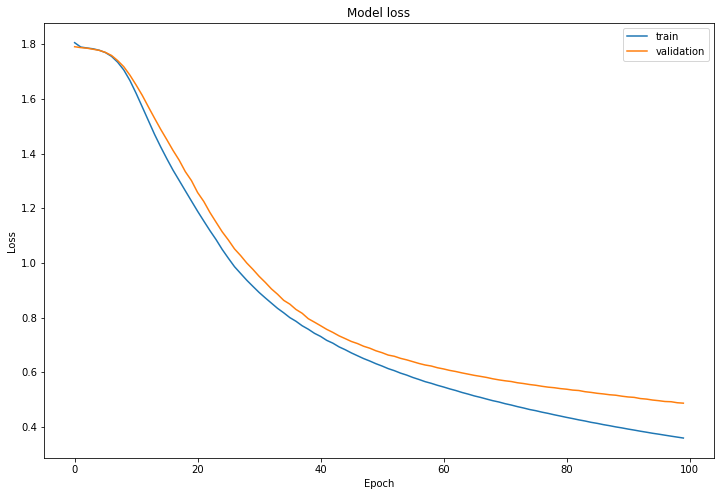

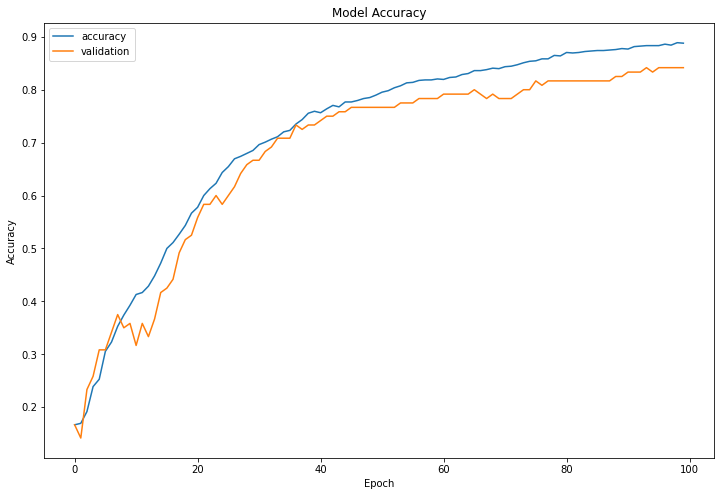

In [6]:
df_loss_acc=pd.DataFrame(history.history)
df_loss=df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)

df_acc=df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'loss':'train','val_accuracy':'validation'},inplace=True)

df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')

df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')